In [1]:
import os 
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
DATA_PATH = os.path.abspath(os.path.join(os.getcwd(),os.path.pardir,'data','interim','train_df.csv'))
PACKAGE_PATH = os.path.abspath(os.path.join(os.getcwd(),os.path.pardir,os.path.pardir,'Common_Functions','read_data'))

In [3]:
sys.path.insert(1, PACKAGE_PATH)

In [4]:
train_df = pd.read_csv(DATA_PATH)

In [5]:
housing = train_df.copy()

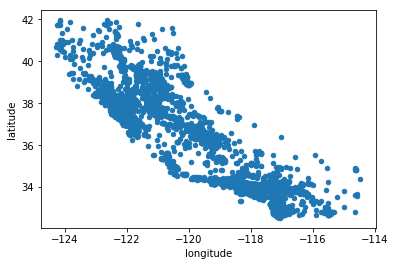

In [6]:
housing.plot(kind = 'scatter', x='longitude', y='latitude')

**Insights**
1. Data points look like california. But it is hard to see any  pattern. Lets set alpha to 0.1

In [7]:
housing = train_df.copy()

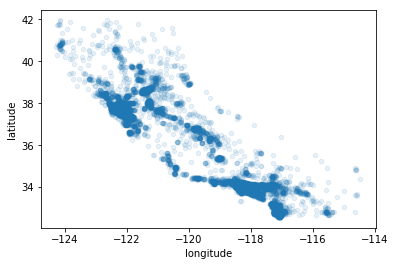

In [8]:
housing.plot(kind = 'scatter', x='longitude', y='latitude', alpha=0.1)

**Insights**
1. We can clearly see high-density areas like the Bay Area and around Los Angeles and San Diego, plus long line of fairly high density in the Central Valley in particular around Sacramento and Fresno

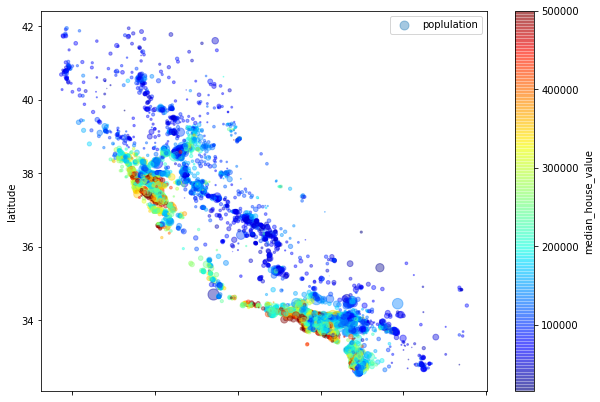

In [9]:
# set population as circle diameter, set color as median house value
housing.plot(kind = 'scatter', x='longitude', y='latitude', alpha=0.4, s = housing['population']/100, label = 'poplulation'
            ,figsize=(10,7),c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

**Insights**
1. Housing prices are very much realated to the location and to the population density.

In [10]:
corr_matrix = housing.corr()

In [11]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.692846
rooms_per_household         0.164805
total_rooms                 0.143286
housing_median_age          0.098164
households                  0.072961
Unnamed: 0                  0.071694
total_bedrooms              0.056634
population                 -0.018110
population_per_household   -0.021440
longitude                  -0.043285
latitude                   -0.145069
bedrooms_per_room          -0.262351
Name: median_house_value, dtype: float64

**Insights**
1. population, population_per_household, longitude, latitude, bedrooms_per_room has some slight negative correlation.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


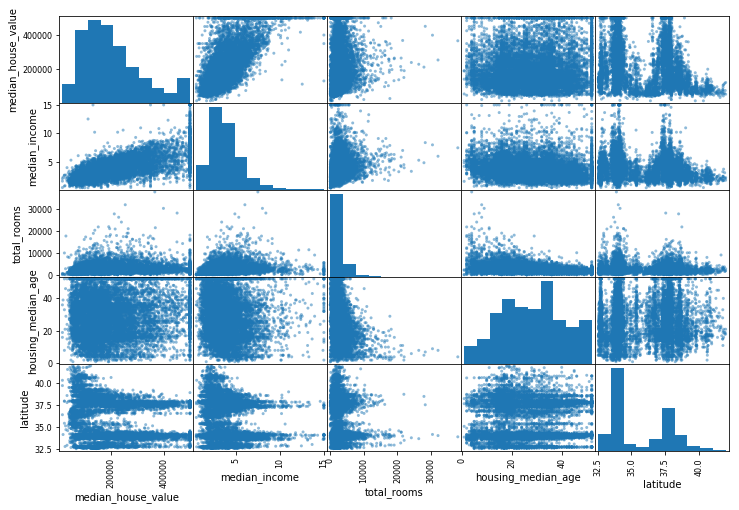

In [12]:
from pandas.tools.plotting import scatter_matrix
attributes = ['median_house_value','median_income','total_rooms','housing_median_age','latitude']
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

**Insights**
1. correlation of median_house_value to median_income is strong.

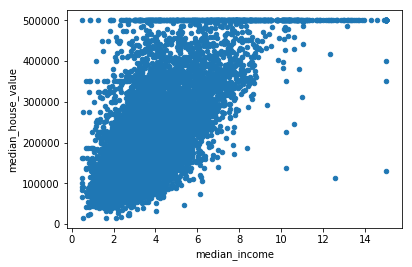

In [13]:
housing.plot(kind = 'scatter', y='median_house_value',x='median_income')

**Insights**
1. horizontal line at 500000 is obvious due to the cap value.
2. horizontal lines at 450000, 350000, 280000 are some data querks which can be removed by removing some data points.